<a href="https://colab.research.google.com/github/Joshua-Abok/Topic-Modelling-using-LDA/blob/main/Topic%20Modelling%20%7C%20KMeans%20%7C%20SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from google.colab import drive
import numpy as np 
import pandas as pd

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fiverr_projects/Linda/Kaggle IMDB Dataset/IMDB Dataset.csv")
# reviews = pd.read_csv('', sep='\t', names=['review', 'sentiment'])

In [ ]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
reviews.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#checking positive and negative values we have using groupby on label col
reviews.groupby('sentiment').describe()  

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [ ]:
#creating a length col - feature engineering
reviews['length'] = reviews['review'].apply(len)

In [ ]:
reviews.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


### Visualize length of the reviews

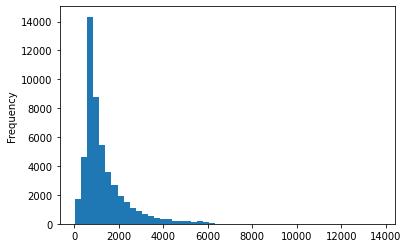

In [ ]:
reviews['length'].plot.hist(bins=50)

In [ ]:
#checking the max review length 
reviews['length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

In [ ]:
reviews[reviews['length'] == 13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407738f640>,
      dtype=object)

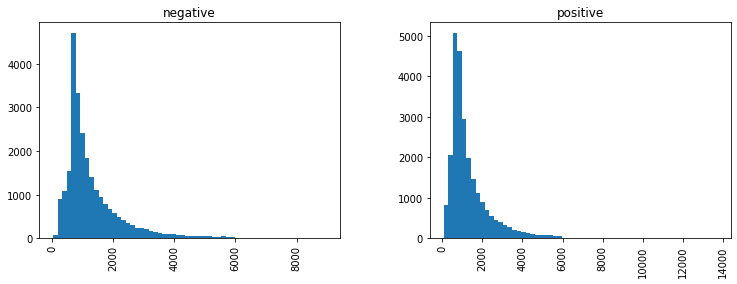

In [ ]:
reviews.hist(column='length', by='sentiment', bins=60, figsize=(12,4))

In [ ]:
reviews = reviews[:2000]

### Text Preprocessing

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords 

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# types of functions
# 1. UDF (User defined functions)

def function_name(x):
  """  
  1. have a functions
  2. doing multiplication
  
  """

  num =  x ** 2
  return num 

# 2. Anonymous functions -> lambda
def function_name(x):
  """  
  1. have a functions
  2. doing multiplication
  
  """

  num =  x ** 2
  return num 

  lambda arguments : expression

# 3. Inbuilt functions - main(), print()

In [ ]:
function_name(4)

16

In [ ]:
# 2. Anonymous functions -> lambda
  # lambda arguments : expression
multi = lambda x : x ** 2
multi(5)


25

In [ ]:
# # list comprehension
# list_box = list(range(10))

# empty_box = []
# for i in list_box:
#   if
#   empty_box.append(i)

In [ ]:
# test = [i for i in list_box]

In [ ]:
# test

In [ ]:
#function for text preprocessing
def text_process(review):
  """
    1.remove punctuation
    2.remove stop words
    3.return list of clean text words
  """
  remove_punc = [char for char in review if char not in string.punctuation]

  # Bubba came to his brother     's rescue 
  remove_punc =''.join(remove_punc)

#split("/")

  return [word for word in remove_punc.split() if word.lower() 
          not in stopwords.words('english')]

In [ ]:
#creating the tokens we want by removing the stopwords
# 1. vectorization
# 2. important
# 3. bow -                           Bubba came to his brother rescue 


# Bubba came to his brother rescue     1    1   1    1    1     1
#  brother rescue                      0    0   0    0    1      1

reviews['review'].head(5).apply(text_process)

0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [Basically, theres, family, little, boy, Jake,...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: review, dtype: object

### Vectorization

 TF 
 IDF
 TF-IDF

In [ ]:
# sklearn.linear_models import LogisticRegression()

# obj_lr = LogisticRegression()

# obj_lr.fit(x_train)

In [ ]:
#vectorization - texts - numbers(vectors) -> matrix
#        card credit credit  fraud
# card   1    0       0 0 0
# credit 0    1       1  1  
# fraud  0    0       0        1
                                      # 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
after_preprocess = bow_transformer.fit(reviews['review'])       #-> unsupervised ML

In [ ]:
print(len(after_preprocess.vocabulary_))

34647


In [ ]:
review100 = reviews['review'][99]
print(review100)

I have been a Mario fan for as long as I can remember, I have very fond memories of playing Super Mario World as a kid, this game has brought back many of those memories while adding something new. Super Mario Galaxy is the latest installment in the amazing Mario franchise. There is much very different about this game from any other Mario before it, while still keeping intact the greatest elements of Mario, the first noticeable difference is that the story takes place in space.<br /><br />The story begins much like any other Mario game, Mario receives a letter from Princess Peach inviting him to a celebration at her castle in the Mushroom Kingdom. Upon arriving at Peach's castle Mario finds Bowser and his son (Bowser Jr.) attacking the castle with their airships. Bowser kidnaps Princess Peach and then lifts her castle up into space. In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet. Mario is found by a talking star named Luma and is taken

In [ ]:
reviews['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [ ]:
bow100 = after_preprocess.transform([review100])

In [ ]:
# bow100 = bow_transformer.transform([review100])

In [ ]:
print(bow100)

  (0, 8)	2
  (0, 315)	1
  (0, 330)	1
  (0, 1857)	4
  (0, 4703)	1
  (0, 6256)	1
  (0, 6501)	1
  (0, 7153)	1
  (0, 7154)	3
  (0, 7461)	18
  (0, 8078)	1
  (0, 8833)	3
  (0, 8835)	1
  (0, 9132)	2
  (0, 9182)	2
  (0, 9861)	2
  (0, 10923)	2
  (0, 10981)	1
  (0, 11120)	2
  (0, 11899)	1
  (0, 12386)	1
  (0, 12387)	1
  (0, 12520)	1
  (0, 12889)	1
  (0, 12912)	1
  :	:
  (0, 32052)	1
  (0, 32225)	1
  (0, 32352)	1
  (0, 32400)	1
  (0, 32717)	1
  (0, 32876)	1
  (0, 32940)	1
  (0, 33222)	1
  (0, 33230)	1
  (0, 33241)	1
  (0, 33435)	1
  (0, 33465)	1
  (0, 33467)	3
  (0, 33614)	1
  (0, 33814)	1
  (0, 33825)	1
  (0, 33960)	2
  (0, 33967)	1
  (0, 33971)	1
  (0, 34032)	1
  (0, 34086)	1
  (0, 34212)	1
  (0, 34292)	1
  (0, 34323)	1
  (0, 34424)	1


In [ ]:
bow_transformer.get_feature_names()[315]   # numbers - remove

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'360'

In [ ]:
bow_transformer.get_feature_names()[7461]

'Mario'

In [ ]:
bow100.shape

(1, 34647)

In [ ]:
review_bow = after_preprocess.transform(reviews['review'])

In [ ]:
print('Sparse Matrix: ', review_bow.shape)
print('Non-Zeros in the Matrix: ', review_bow.nnz)

Sparse Matrix:  (2000, 34647)
Non-Zeros in the Matrix:  200821


In [ ]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.2898100845672064


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)

In [ ]:
tfidf100 = tfidf_transformer.transform(bow100)
print(tfidf100) 

  (0, 34424)	0.01978889945852369
  (0, 34323)	0.020732259555320834
  (0, 34292)	0.01869610803297604
  (0, 34212)	0.0452333763250554
  (0, 34086)	0.03410322380055342
  (0, 34032)	0.013814345122344206
  (0, 33971)	0.026597823483452868
  (0, 33967)	0.02638195760342868
  (0, 33960)	0.02825766023334374
  (0, 33825)	0.029198808318005667
  (0, 33814)	0.027819417560011182
  (0, 33614)	0.033339455356547094
  (0, 33467)	0.06367907824531857
  (0, 33465)	0.021183514518646314
  (0, 33435)	0.038949570084513156
  (0, 33241)	0.030138583477717317
  (0, 33230)	0.03370860065563282
  (0, 33222)	0.02824329788858283
  (0, 32940)	0.02450299090391637
  (0, 32876)	0.022470524798537138
  (0, 32717)	0.03498492976167706
  (0, 32400)	0.018426257663983883
  (0, 32352)	0.029743960332796714
  (0, 32225)	0.01707139505511502
  (0, 32052)	0.026277004806831466
  :	:
  (0, 12912)	0.0452333763250554
  (0, 12889)	0.024657588610474603
  (0, 12520)	0.028544407774584727
  (0, 12387)	0.0452333763250554
  (0, 12386)	0.0452333763

In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["credit"]])

5.0178833961276235


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["card"]])

6.65549218552842


In [ ]:
reviews_tfidf = tfidf_transformer.transform(review_bow)
print(reviews_tfidf.shape)

(2000, 34647)


### Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=2, init="random").fit(reviews_tfidf)


In [ ]:
# look at distribution of cluster labels
pd.Series(clustering.labels_).value_counts()

1    1385
0     615
dtype: int64

In [ ]:
def get_cluster(number, data,  cluster):
    return(data[cluster.labels_ == number])

In [ ]:
for i in range(2):
    
    print(f"Cluster {i}:\n")
    print(get_cluster(i, data = reviews['review'], cluster = clustering))
    print("\n")

Cluster 0:

3       Basically there's a family where a little boy ...
9       If you like original gut wrenching laughter yo...
12      So im not a big fan of Boll's work but then ag...
14      This a fantastic movie of three prisoners who ...
17      This movie made it into one of my top 10 most ...
                              ...                        
1991    I have seen so many bad reviews on Supervivien...
1992    This film is really bad. It maybe harsh, but i...
1994    One of the worst movies ever made... If you ca...
1998    I loved this movie! It was all I could do not ...
1999    This was the worst movie I have ever seen Bill...
Name: review, Length: 615, dtype: object


Cluster 1:

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
4       Petter Mattei's "Love in the Time of Money" is...
5       Probably my all-time favorite movie, a story o...
     

In [ ]:
pred = clustering.labels_

In [ ]:
reviews["prediction"] = pred

In [ ]:
reviews.sample(7)

,review,sentiment,length,prediction
1666,And that goes especially for lawyers & cops. P...,positive,1017,1
50,Return to the 36th Chamber is one of those cla...,positive,2411,1
974,Whatever rating I give BOOM is only because of...,negative,1139,1
508,My ratings: Acting - 3/10 Suspense - 2/10 Char...,negative,706,1
763,I saw this movie while surfing through infomer...,negative,544,0
1752,Lucio Fulci made a lot of great films througho...,positive,2472,1
169,The Lives of the Saints starts off with an atm...,negative,2028,1


In [ ]:
def labelling(row):
  if (row['prediction'] == 1):
    label = 'pos'
  else:
    label = 'neg'
  return label

In [ ]:
reviews['pred_cat'] = reviews.apply(lambda row: labelling(row), axis=1)

In [ ]:
reviews[["review", "pred_cat"]].sample(10)

,review,pred_cat
1232,I'm not sure this film could ever match the fi...,pos
417,I like Ghost stories. Good ghost stories of bu...,pos
1944,Really!Here the French cinema hits rock bottom...,pos
464,When Carol (Vanessa Hidalgo) starts looking in...,pos
1318,"Just how bad? Well, compared to this movie, Ca...",pos
999,"This is like a zoology textbook, given that it...",pos
328,The sexploitation movie era of the late sixtie...,pos
845,It's not easy to find Judas Kiss on VHS (it's ...,pos
1718,Any one who has seen Mel Gibson's The Passion ...,pos
1808,A group of young filmmakers with virtually no ...,pos


In [ ]:
reviews['review'][415]   #-wordcloud

'The most self-indulgent movie I have every had the misfortune to<br /><br />rent. Unwatchable. Much of the movie is obviously improvised,<br /><br />and not well. It looks like Toback took the first take of<br /><br />everything. The movie gets good for a couple of minutes when<br /><br />Robert Downey Jr. shows up, then goes to hell again real<br /><br />quickly.'

### Topic Modelling 

In [ ]:
#Libraries for dictionary, doc_term_matrix, LDA implementation
import gensim
import gensim.corpora as corpora

In [ ]:
# Create Dictionary
Preprocessed_corpus = reviews["review"].apply(text_process)  
id2word_dic = corpora.Dictionary(Preprocessed_corpus) 

In [ ]:
Preprocessed_corpus 

0       [One, reviewers, mentioned, watching, 1, Oz, e...
1       [wonderful, little, production, br, br, filmin...
2       [thought, wonderful, way, spend, time, hot, su...
3       [Basically, theres, family, little, boy, Jake,...
4       [Petter, Matteis, Love, Time, Money, visually,...
                              ...                        
1995    [Feeling, Minnesota, directed, Steven, Baigelm...
1996    [CELL, 2000, Rating, 810br, br, Cell, like, An...
1997    [movie, despite, list, B, C, list, celebs, com...
1998    [loved, movie, could, break, tears, watching, ...
1999    [worst, movie, ever, seen, Billy, Zane, unders...
Name: review, Length: 2000, dtype: object

In [ ]:
id2word_dic

In [ ]:
corpus = [id2word_dic.doc2bow(i) for i in Preprocessed_corpus]  #id - word     

In [ ]:
#Implementing the LdaModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=7, id2word = id2word_dic)
print(ldamodel.print_topics(num_topics=2, num_words=2))

[(2, '0.018*"br" + 0.018*"movie"'), (5, '0.016*"br" + 0.010*"film"')]


In [ ]:
coherence = []
for k in range(2,25):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = id2word_dic)
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=Preprocessed_corpus, dictionary=id2word_dic, coherence='c_v')
    coherence.append((k, 'default', 'default', cm.get_coherence()))

In [ ]:
co_matrix = pd.DataFrame(coherence, columns=['lda_numOfTopics', 'alpha',	'eta', 'coherence_score'])



In [ ]:
co_matrix

,lda_numOfTopics,alpha,eta,coherence_score
0,2,default,default,0.291330
1,3,default,default,0.301213
2,4,default,default,0.296579
3,5,default,default,0.296604
4,6,default,default,0.302155
5,7,default,default,0.294721
6,8,default,default,0.292247
7,9,default,default,0.293391
8,10,default,default,0.292279
9,11,default,default,0.297138


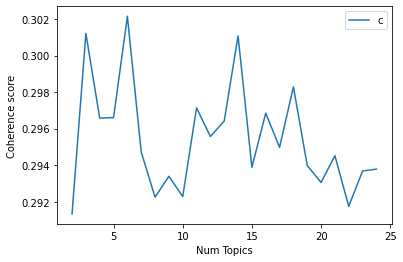

In [ ]:

import matplotlib.pyplot as plt


x = range(2,25)
plt.plot(x, co_matrix['coherence_score'])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

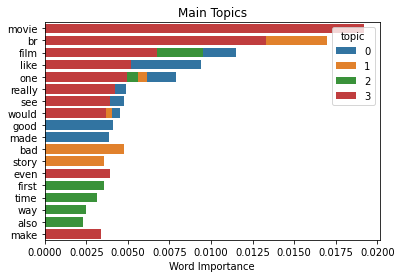

In [ ]:
import seaborn as sns

lst_dics = []   
for i in range(0,4):   
    lst_tuples = ldamodel.get_topic_terms(i)   
    for tupla in lst_tuples:   
        lst_dics.append({"topic":i, "id":tupla[0],    
                         "word":id2word_dic[tupla[0]],    
                         "weight":tupla[1]})   
dtf_topics = pd.DataFrame(lst_dics,    
                         columns=['topic','id','word','weight'])

## plot   
fig, ax = plt.subplots()   
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')   
ax.set(ylabel="", xlabel="Word Importance")   
plt.show()
